In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [2]:
df=sns.load_dataset('exercise')
df

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running


# EDA

In [3]:
df.head(10)

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
5,5,2,low fat,93,30 min,rest
6,6,3,low fat,97,1 min,rest
7,7,3,low fat,97,15 min,rest
8,8,3,low fat,94,30 min,rest
9,9,4,low fat,80,1 min,rest


In [4]:
df.tail(10)

,Unnamed: 0,id,diet,pulse,time,kind
80,80,27,no fat,140,30 min,running
81,81,28,no fat,103,1 min,running
82,82,28,no fat,124,15 min,running
83,83,28,no fat,140,30 min,running
84,84,29,no fat,94,1 min,running
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running
89,89,30,no fat,150,30 min,running


In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'diet', 'pulse', 'time', 'kind'], dtype='object')

In [6]:
df.ndim

2

In [7]:
df.shape

(90, 6)

In [8]:
df.info

<bound method DataFrame.info of     Unnamed: 0  id     diet  pulse    time     kind
0            0   1  low fat     85   1 min     rest
1            1   1  low fat     85  15 min     rest
2            2   1  low fat     88  30 min     rest
3            3   2  low fat     90   1 min     rest
4            4   2  low fat     92  15 min     rest
..         ...  ..      ...    ...     ...      ...
85          85  29   no fat    135  15 min  running
86          86  29   no fat    130  30 min  running
87          87  30   no fat     99   1 min  running
88          88  30   no fat    111  15 min  running
89          89  30   no fat    150  30 min  running

[90 rows x 6 columns]>

In [9]:
df.describe

<bound method NDFrame.describe of     Unnamed: 0  id     diet  pulse    time     kind
0            0   1  low fat     85   1 min     rest
1            1   1  low fat     85  15 min     rest
2            2   1  low fat     88  30 min     rest
3            3   2  low fat     90   1 min     rest
4            4   2  low fat     92  15 min     rest
..         ...  ..      ...    ...     ...      ...
85          85  29   no fat    135  15 min  running
86          86  29   no fat    130  30 min  running
87          87  30   no fat     99   1 min  running
88          88  30   no fat    111  15 min  running
89          89  30   no fat    150  30 min  running

[90 rows x 6 columns]>

# Preprocessing

In [10]:
df.isnull().sum()

Unnamed: 0    0
id            0
diet          0
pulse         0
time          0
kind          0
dtype: int64

In [11]:
df.diet.unique()

['low fat', 'no fat']
Categories (2, object): ['no fat', 'low fat']

In [12]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


In [13]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
b=['diet','time','kind']
for i in b:
    df[i]=a.fit_transform(df[i])
df

,id,diet,pulse,time,kind
0,1,0,85,0,0
1,1,0,85,1,0
2,1,0,88,2,0
3,2,0,90,0,0
4,2,0,92,1,0
...,...,...,...,...,...
85,29,1,135,1,1
86,29,1,130,2,1
87,30,1,99,0,1
88,30,1,111,1,1


In [14]:
#Min Max scaler

from sklearn.preprocessing import MinMaxScaler
a=MinMaxScaler(feature_range=(1,2))
df[['pulse']]=a.fit_transform(df[['pulse']])
df


,id,diet,pulse,time,kind
0,1,0,1.071429,0,0
1,1,0,1.071429,1,0
2,1,0,1.114286,2,0
3,2,0,1.142857,0,0
4,2,0,1.171429,1,0
...,...,...,...,...,...
85,29,1,1.785714,1,1
86,29,1,1.714286,2,1
87,30,1,1.271429,0,1
88,30,1,1.442857,1,1


# Visualization

<BarContainer object of 90 artists>

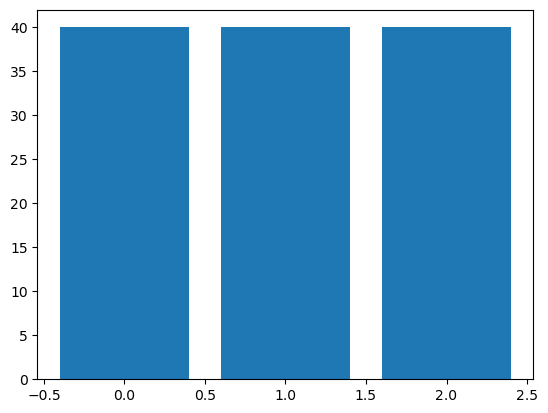

In [15]:
plt.bar(x=df['kind'],height=40)


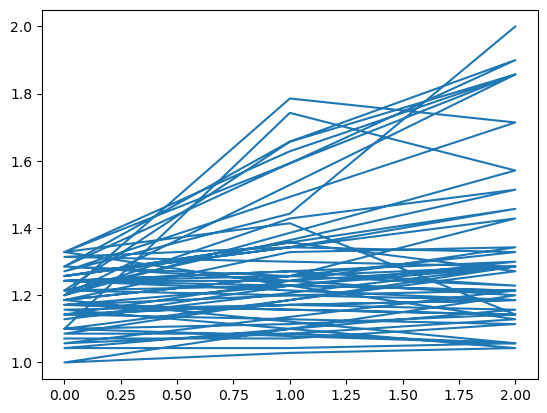

In [16]:
plt.plot(df['time'],df['pulse'])


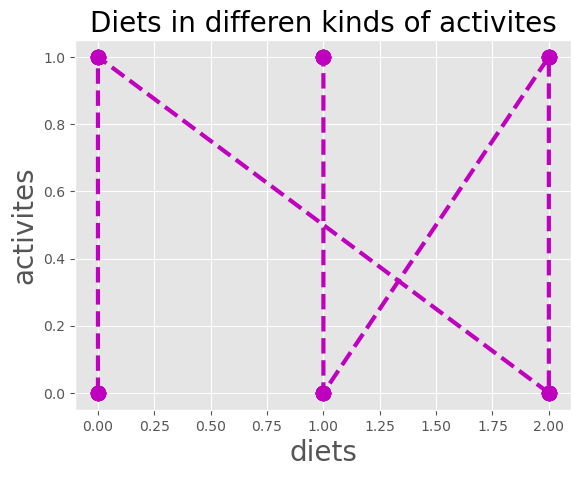

In [17]:
from matplotlib import style   ##import style module
style.use('ggplot')  #g ive ggplot parameter value to use() method
plt.plot(df['kind'],df['diet'],'mo--',linewidth=3,markersize=10,label="Temp line")
plt.title('Diets in differen kinds of activites', fontsize=20)
plt.xlabel('diets',fontsize=20)
plt.ylabel('activites',fontsize=20,)
plt.show()

<Axes: >

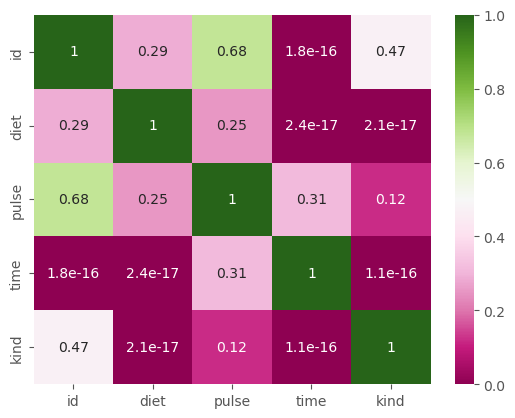

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

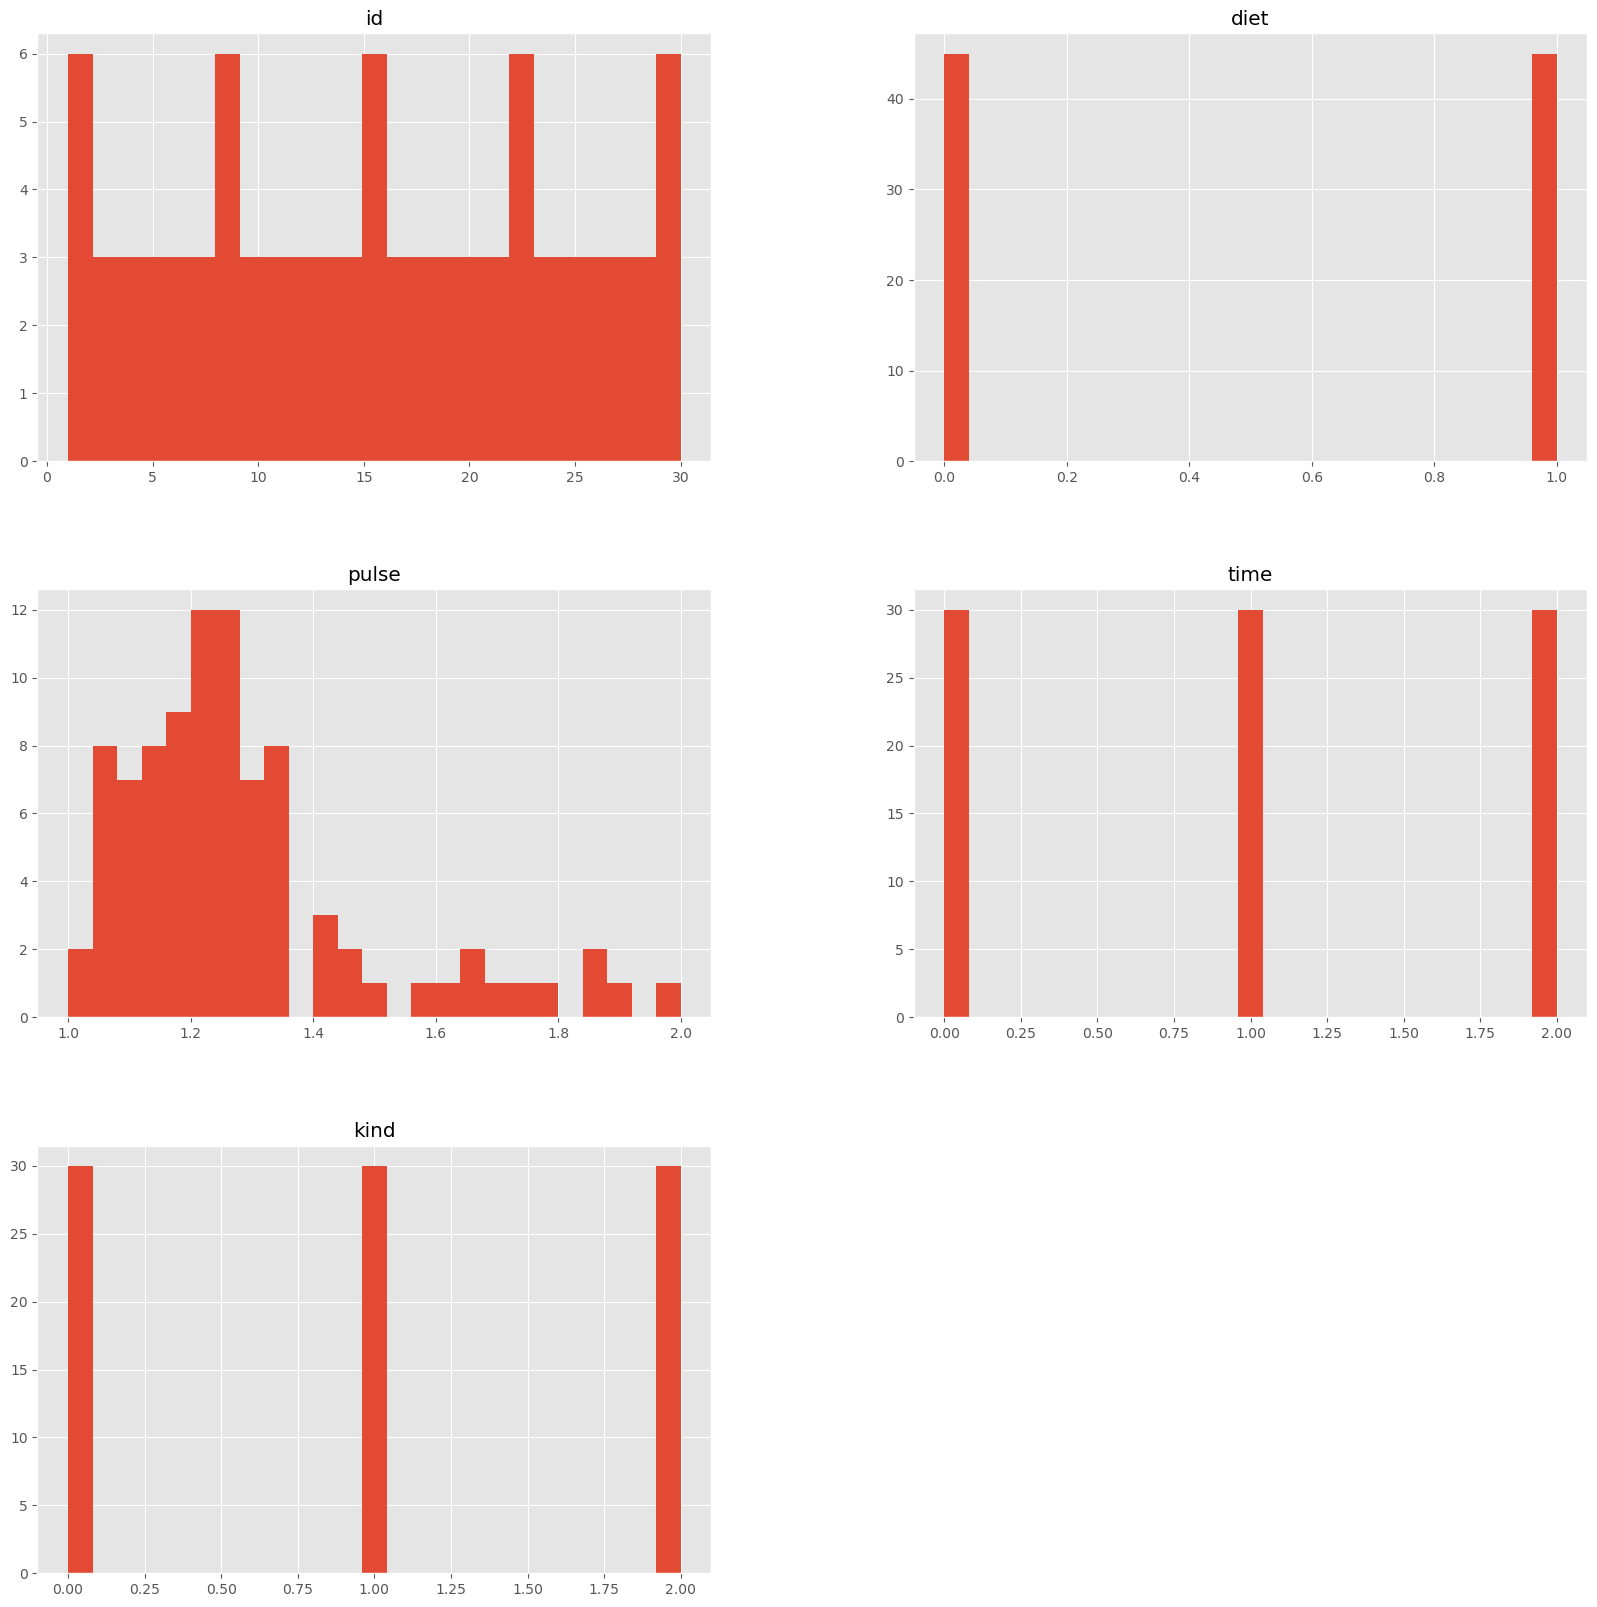

In [19]:
df.hist(bins=25,figsize=(20,20));

<Axes: xlabel='diet', ylabel='Density'>

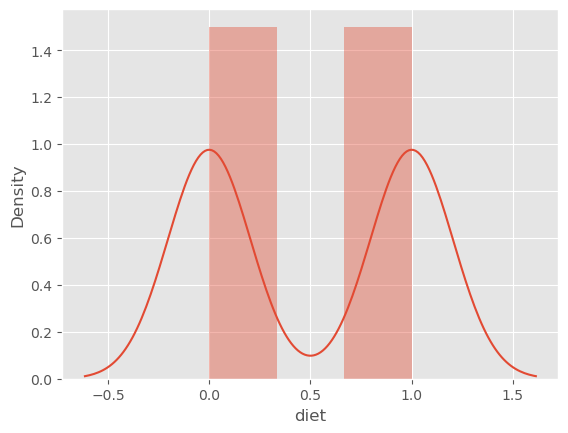

In [20]:
sns.distplot(df['diet'])

# Dropping columns 

In [21]:
x=df.drop('diet',axis=1)
x

,id,pulse,time,kind
0,1,1.071429,0,0
1,1,1.071429,1,0
2,1,1.114286,2,0
3,2,1.142857,0,0
4,2,1.171429,1,0
...,...,...,...,...
85,29,1.785714,1,1
86,29,1.714286,2,1
87,30,1.271429,0,1
88,30,1.442857,1,1


In [22]:
y=df['diet']
y

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: diet, Length: 90, dtype: int64

# Splitting x and y

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=45)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(72, 4) (72,) (18, 4) (18,)


# Model Selection 

# Support vector classifier

In [24]:
from sklearn.svm import SVC
mod=SVC()
mod.fit(xtrain,ytrain)
from sklearn.metrics import accuracy_score
p=mod.predict(xtest)
accuracy_score(p,ytest)*100

55.55555555555556

# K-NN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
mod1=KNeighborsClassifier()
mod1.fit(xtrain,ytrain)
p=mod1.predict(xtest)
accuracy_score(ytest,p)*100

100.0

# Navie Bayes

### BernoulliNB

In [26]:
from sklearn.naive_bayes import BernoulliNB
mod2=BernoulliNB()
mod2.fit(xtrain,ytrain)
p=mod2.predict(xtest)
accuracy_score(ytest,p)*100

38.88888888888889

### MultinomialNB

In [27]:
from sklearn.naive_bayes import MultinomialNB
mod3=MultinomialNB()
mod3.fit(xtrain,ytrain)
p=mod3.predict(xtest)
accuracy_score(ytest,p)*100

66.66666666666666

### GaussianNB

In [28]:
from sklearn.naive_bayes import GaussianNB
mod4=GaussianNB()
mod4.fit(xtrain,ytrain)
p=mod4.predict(xtest)
accuracy_score(ytest,p)*100


55.55555555555556

# Final Prediction

In [29]:
values=[[29,11.714286,2,1]]
prediction=mod1.predict(values)
prediction
if prediction==0:
    print('Low fat')
else:
    print('no fat')

no fat
